# Numerisk integrasjon

### Det bestemte integralet og riemannsummer
Gitt en kontinuerlig funksjon $f$ på intervallet $[a,b]$ vet vi at integralet $\int_a^bf(x) \,\mathrm{d}x$ kan sees på som grenseverdien av *riemannsummer*.

En partisjon, eller inndeling, $P$ av intervallet $[a,b]$ er en samling punkter $P \doteq \{x_0, x_1, \dots, x_n\}$ som oppfyller $a = x_0 < x_1 < \dots < x_n = b$.
Disse deler $[a,b]$ inn i $n$ delintervaller med lengde $h_k \doteq x_k-x_{k-1}$ for $k \in \{1,\dots,n\}$, og i hvert av disse kan vi velge oss et punkt $x_k^* \in [x_{k-1}, x_k]$.
Da er 
$$ \sum_{k=1}^{n} h_k f(x_{k}^*) $$
en *riemannsum* for funksjonen $f$ på intervallet $[a,b]$. Lengden av det lengste delintervallet er et mål på hvor fin partisjonen $P$ er, og vi skriver $\|P\| = \max_{1\le k \le n}h_k$.
Vi kan redusere denne ved å øke $n$, det vil si dele $[a,b]$ opp i flere delintervaller.
Da har vi lært at grenseverdien av riemannsummen er det bestemte integralet,
$$ \lim_\limits{\|P\|\to0} \sum_{k=1}^{n} h_k f(x_{k}^*) = \int_{a}^{b} f(x)\,\mathrm{d}x \doteq I.$$

Her kan vi forenkle uttrykkene litt ved å la avstanden mellom hvert punkt $x_k$ i partisjonen være like lang, det vil si å velge $h_k = h = (b-a)/n$ slik at $x_k = a + k h$ for $k \in \{0,1,\dots,n\}$, og vi får
$$ \lim_\limits{n\to\infty} h\sum_{k=1}^{n} f(x_{k}^*) = \int_{a}^{b} f(x)\,\mathrm{d}x.$$
Vi vil fra nå av alltid gjøre dette valget.

Tilsvarende definisjonen av den deriverte, ser vi at det bestemte integralet også opptrer som en grenseverdi og det krever "uendelig" mange steg å evaluere den.
På samme måte som for numerisk derivasjon kan vi da tenke oss at en enkel tilnærming av det bestemte integralet vil være å simpelthen velge riemannsummen for en endelig, fin nok partisjon $P$, altså en stor nok verdi av $n$.


## Trapesmetoden

I riemannsummen tilnærmer man $f$ på hvert intervall $[x_{k-1}, x_k]$ med et rektangel med høyde $f(x_k^*)$, og tilnærmingen av integralet blir arealet av rektangelet, $h f(x_k^*)$.

Et alternativ til dette er å tilnærme integralet av $f$ over $[x_{k-1},x_k]$ med arealet av trapeset med hjørner i $(x_{k-1},0)$, $(x_{k},0)$, $(x_{k-1},f(x_{k-1}))$ og $(x_k,f(x_k))$, som er $\frac{h}{2} (f(x_{k-1})+f(x_k))$.
Dette er *trapesmetoden*, hvor vi altså tilnærmer
$$ \int_{x_{k-1}}^{x_k}f(x)\,\mathrm{d}x \quad \text{med} \quad \frac{h}{2}\left(f(x_{k-1}) + f(x_k) \right), $$
og for en tilstrekkelig glatt funksjon vil feilen vi gjør være proporsjonal med $f''(c_k)h^3$ for en $c_k \in (x_{k-1},x_k)$.

Ved å gjøre denne tilnærmingen på hvert delintervall i $[a,b]$ og summere bidragene får vi det som kalles (kompositt-)trapesmetoden for det bestemte integralet av $f$ over $[a,b]$,
og vi skriver $T_n$ for tilnærmingen med $n$ delintervaller, som blir
$$ T_n = \frac{h}{2}\sum_{k=1}^n (f(x_{k-1}) + f(x_k)) = \frac{h}{2} \left( f(x_0) + 2f(x_1) + 2f(x_2) + \dots + 2f(x_{n-1}) + f(x_n)\right).$$

Siden feilen vi gjør på hvert delintervall akkumuleres vil ikke feilen være kubisk i $h$, men kvadratisk: man kan vise at $\sum_{k=1}^n f''(c_k) = n f''(c)$ for en $c \in (a,b)$, og siden $nh = b-a$ vil feilen med (kompositt-)trapesmetoden $T_n - I$ være proporsjonal med $(b-a)h^2 f''(c)$.


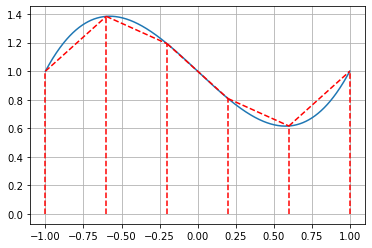

In [137]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

def f1(x):
    return 1+x**3-x

y = np.linspace(-1,1,501)

N = 6
xs = np.linspace(-1,1,N)

plt.plot(y,f1(y))
plt.grid(True)
for k in range(0,N-1):
    plt.plot([xs[k],xs[k+1]],[f1(xs[k]),f1(xs[k+1])],'r--')
    plt.plot([xs[k+1],xs[k+1]], [0,f1(xs[k+1])],'r--')
plt.plot([xs[0],xs[0]], [0,f1(xs[0])],'r--')


## Simpsons metode

Trapesmetoden kan tenkes på som at man på hvert delintervall $[x_{k-1}, x_k]$ interpolerer $f$ med et førstegrads polynom (en lineær funksjon), det vil si linjestykket som går fra $(x_{k-1},f(x_{k-1}))$ til $(x_k,f(x_k))$. Tilnærmingen $T_n$ er da hva man får ved å integrere interpolasjonsfunksjonen eksakt.

Idéen bak *Simpsons metode* er at man vil få en bedre tilnærming ved å bruke et andreordens polynom.
For å interpolere med et andreordens polynom trenger vi funksjonsverdien i tre påfølgende punkter $x_{k-2}$, $x_{k-1}$ og $x_k$; altså kan vi tenke oss at vi ser på to delintervaller $[x_{k-2},x_{k-1}]$ og $[x_{k-1},x_k]$ samtidig.
Derfor er det viktig at antallet delintervaller $n$ er et partall, $n = 2m$ for et heltall $m$ slik at $[a,b]$ kan deles opp i $m$ delintervaller $[x_{2(k-1)},x_{2k}]$.

$$ \int_{x_{2k-2}}^{x_{2k}}f(x)\,\mathrm{d}x \quad \text{med} \quad \frac{h}{3}\left(f(x_{2k-2}) + 4f(x_{2k-1}) + f(x_{2k}) \right), $$
Feilen er her proporsjonal med $h^5 f^{(4)}(c_k)$ for en $c_k \in (x_{2k-2},x_{2k})$.

Ved å summere bidragene fra hvert av de $m$ parene av delintervaller får vi komposittversjonen av Simpsons metode, hvor tilnærmingen $S_n = S_{2m}$ er gitt av

$$ S_n  = \frac{h}{3}\sum_{k=1}^{m}(f(x_{2k-2}) + 4f(x_{2k-1}) + f(x_{2k})) = \frac{h}{3} \left( f(x_0) + 4f(x_1) + 2f(x_2) + 4f(x_3) + \dots + 2f(x_{n-2}) + 4f(x_{n-1}) + f(x_n) \right). $$
På tilsvarende vis som for trapesmetoden kan vi utlede at feilen $S_n - I$ er proporsjonal med $h^4 f^{(4)}(c)$ for en $c \in (a,b)$.

**Eksempel**: La oss tilnærme integralet av $f(x) = e^x$ over intervallet $[-1,1]$ med både trapesmetoden og Simpsons metode for $n=2$.
Partisjonen vår består da av $x_0 = -1$, $x_1 = 0$ og $x_2 = 1$, med $h = 1$.
Trapesmetoden gir oss
$$ T_2 = \frac12 \left(e^{-1} + 2 + e^{1} \right) = 1 + \cosh(1),$$
og Simpsons metode gir
$$ S_2 = \frac{1}{3} \left(e^{-1} + 4 + e^{1}\right) = \frac{4+2\cosh(1)}{3}. $$
Vi kan regne ut det eksakte svaret er $e^1-e^{-1} = 2 \sinh(1)$, og og med det sjekke at $S_2$ gir en bedre tilnærming enn $T_2$.


La oss sjekke at hvordan feilen endrer seg med antall delintervaller gitt av $n = 2^k$ for økende $k$.

In [154]:
errT = np.abs(1+np.cosh(1)-2*np.sinh(1))
errS = np.abs((4+2*np.cosh(1))/3-2*np.sinh(1))
print('Feilen med trapesmetoden er ca. {:.3f}, men feilen med Simpsons metode er ca. {:.3f}.'.format(errT,errS))

Feilen med trapesmetoden er ca. 0.193, men feilen med Simpsons metode er ca. 0.012.


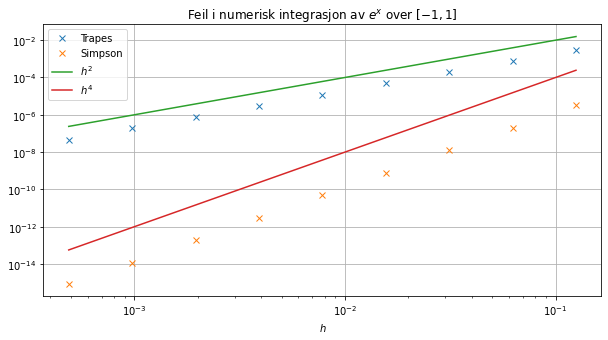

In [158]:
def f2(x):
    return np.exp(x)

def trapezoid(f,a,b,n):
    # f funksjon, intervall [a,b], n delintervaller
    h = (b-a)/n
    xk = np.linspace(a,b,n+1)
    fk = f(xk)
    return (h/2)*np.sum(fk[0:n]+fk[1:])

def simpson(f,a,b,n):
    # f funksjon, intervall [a,b], n=2m delintervaller
    h = (b-a)/n
    xk = np.linspace(a,b,n+1)
    fk = f(xk)
    return (h/3)*(np.sum(fk[0:n-1:2] + fk[2:n+1:2] + 4*fk[1:n+1:2]) )

pmin = 4
pmax = 12
N = pmax-pmin+1

I = np.zeros([N,2])
a = -1
b = 1
hk = np.zeros(N)

for k in range(0,N):
    n = 2**(pmin+k)
    hk[k] = (b-a)/n
    I[k,0] = trapezoid(f2,a,b,n)
    I[k,1] = simpson(f2,a,b,n)

ans = 2*np.sinh(1) # korrekt verdi
err = np.abs(I-ans) # feilen

plt.figure(figsize=(10,5))
plt.loglog(hk,err,'x')
plt.loglog(hk,hk**2)
plt.loglog(hk,hk**4)
plt.title('Feil i numerisk integrasjon av $e^x$ over $[-1,1]$')
plt.grid(True)
plt.xlabel('$h$')
plt.legend(['Trapes','Simpson','$h^2$','$h^4$'])

Vi ser, som forventet, at feilen med trapesmetoden avtar som $h^2$ og feilen med Simpsons metode avtar som $h^4$.

**Kilde**: Sauer Kap. 5.2

## Anvendelse: estimering av hastighet II
La oss gå tilbake til eksempelet med dronen fra notatet om numerisk derivasjon.
Den gangen brukte vi at hastigheten $v(t)$ er den deriverte av posisjonen $x(t)$ med hensyn på tid $t$, $x'(t) = v(t)$.
Hvis vi igjen deriverer hastigheten med hensyn på tid vil vi få akselerasjonen $a(t)$, det vil si $x''(t) = v'(t) = a(t)$.
Dermed kan vi alternativt finne hastigheten ved å integrere akselerasjonen, gitt at denne (og starthastigheten $v(0)$) er kjent for oss,
$$ v(t) = v(0) + \int_0^t a(s)\,\mathrm{d}s. $$

Vi tenker oss derfor at dronen er utstyrt med et *akselerometer*, hvor vi er gitt en rekke målinger $\{a_k\}_{k=0}^n$ av akselerasjonen for $t_k = k h$, $h>0$, og vi antar at dronen er i ro ved $t_0 = 0$.
Da kan vi bruke en av metodene for numerisk integrasjon ovenfor til å tilnærme hastigheten $v(t_k)$.
For eksempel, med trapesmetoden vil tilnærmingen $v_k$ være gitt av
$$ v_k = S_k = \frac{h}{2}\sum_{j=1}^k (a_{j-1}+a_j), \qquad k \in \{1,\dots,n\}. $$

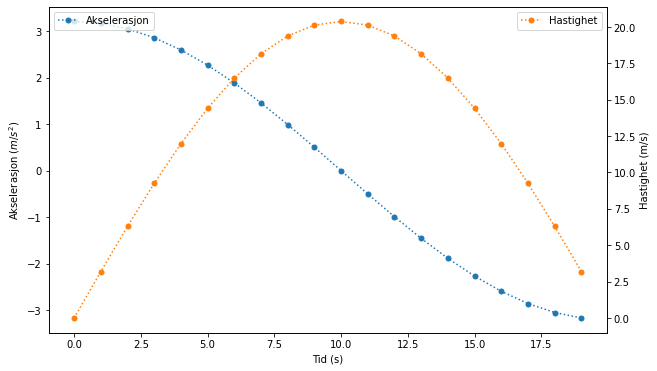

In [171]:
# a_n er en logg med akselerasjonsmålinger gitt i m/s
a_n = np.array([ 3.20762143e+00,  3.16813029e+00,  3.05062926e+00,  2.85801162e+00,
                2.59502025e+00,  2.26813086e+00,  1.88539257e+00,  1.45622966e+00,
                9.91209535e-01,  5.01782545e-01,  1.96410166e-16, -5.01782545e-01,
               -9.91209535e-01, -1.45622966e+00, -1.88539257e+00, -2.26813086e+00,
               -2.59502025e+00, -2.85801162e+00, -3.05062926e+00, -3.16813029e+00])

h = 1 # Skrittlengde lik 1 sekund
t_n = np.arange(0, h*len(a_n), h) # Array med måletidspunkt

v_n = np.zeros(len(a_n)) # Integral over tid
S = 0 # Samlet integral

# Løkke for å utføre numerisk integrasjon
for n in range(1,len(a_n)):
        S += (a_n[n] + a_n[n-1])/2*h
        v_n[n] = S

# Plott akselerasjonsdata og hastighetsdata
plt.figure(figsize=(10,6))
plt.plot(t_n, a_n, ':o', markersize=5, label = "Akselerasjon")
plt.legend(loc='upper left')
plt.ylabel("Akselerasjon ($m/s^2$)")
plt.xlabel('Tid (s)')
plt.twinx()
plt.plot(t_n, v_n, ':oC1', markersize=5, label= "Hastighet")
plt.ylabel("Hastighet (m/s)")
plt.legend(loc='upper right')
#plt.grid(True)

Ovenfor ser vi akselerasjonsålingene $a_k$ i blått, og de estimerte hastighetene $v_k$ i oransje. Dersom vi ser tilbake til de estimerte hastighetene vi fant med numerisk derivasjon av posisjonsdata, ser vi at denne kurven stemmer godt overens med kurven vi fant tidligere.

***Kan kanskje ha et separat arbeidsark med kombinasjon av derivasjon og integrasjon, siden dette ikke er direkte pensum?***